<a href="https://colab.research.google.com/github/Alvaro217-h/challege1_alura/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importaci√≥n de datos



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [3]:
lista_tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["tienda", "tienda2", "tienda3", "tienda4"]

    Tienda        Precio
0   tienda  1.150880e+09
1  tienda2  1.116344e+09
2  tienda3  1.098020e+09
3  tienda4  1.038376e+09




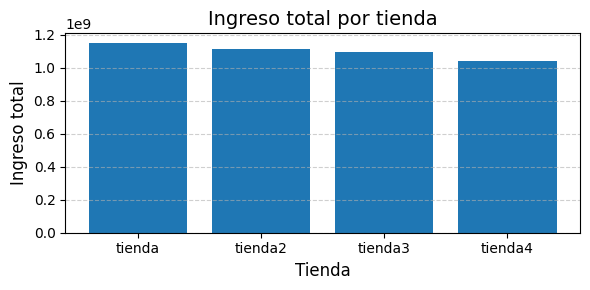

In [4]:
#calcular el ingreso total de cada tienda
ingreso_total = pd.DataFrame({
    'Tienda': nombres,
    'Precio': [df['Precio'].sum() for df in lista_tiendas]
})

print(ingreso_total)
print("\n")

# --- Crear el gr√°fico de barras ---
ingreso_total = ingreso_total.sort_values(by='Precio', ascending=False)
plt.figure(figsize=(6, 3))  # tama√±o del gr√°fico
plt.bar(ingreso_total['Tienda'], ingreso_total['Precio'])  # eje x = Tienda, eje y = Precio

# --- Personalizar el gr√°fico ---
plt.title('Ingreso total por tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingreso total', fontsize=12)
plt.xticks(rotation=0)  # rotar etiquetas para mejor lectura
plt.grid(axis='y', linestyle='--', alpha=0.6)  # l√≠neas de gu√≠a horizontales

# --- Mostrar el gr√°fico ---
plt.tight_layout()
plt.show()




# 2. Ventas por categor√≠a

In [5]:
ventas_por_categoria = {}

for nombre, df in zip(nombres, lista_tiendas):
    df_resumen = (
        df.groupby('Categor√≠a del Producto')['Producto']
          .count()
          .reset_index(name='Cantidad de productos vendidos')
          .sort_values(by='Cantidad de productos vendidos', ascending=False)
          .reset_index(drop=True)
    )
    #crear columna tiendas con los nombres asociados
    df_resumen['Tienda'] = nombre
    #guardar el data frame generado para cada tienda
    ventas_por_categoria[nombre] = df_resumen

for nombre in nombres:
    print("="*60)
    print(f"Tienda: {nombre}")
    print("="*60)
    print(ventas_por_categoria[nombre].to_string(index=False))
    print("\n")

Tienda: tienda
 Categor√≠a del Producto  Cantidad de productos vendidos Tienda
                Muebles                             465 tienda
           Electr√≥nicos                             448 tienda
               Juguetes                             324 tienda
      Electrodom√©sticos                             312 tienda
   Deportes y diversi√≥n                             284 tienda
 Instrumentos musicales                             182 tienda
                 Libros                             173 tienda
Art√≠culos para el hogar                             171 tienda


Tienda: tienda2
 Categor√≠a del Producto  Cantidad de productos vendidos  Tienda
                Muebles                             442 tienda2
           Electr√≥nicos                             422 tienda2
               Juguetes                             313 tienda2
      Electrodom√©sticos                             305 tienda2
   Deportes y diversi√≥n                             275 tienda2
 Instru

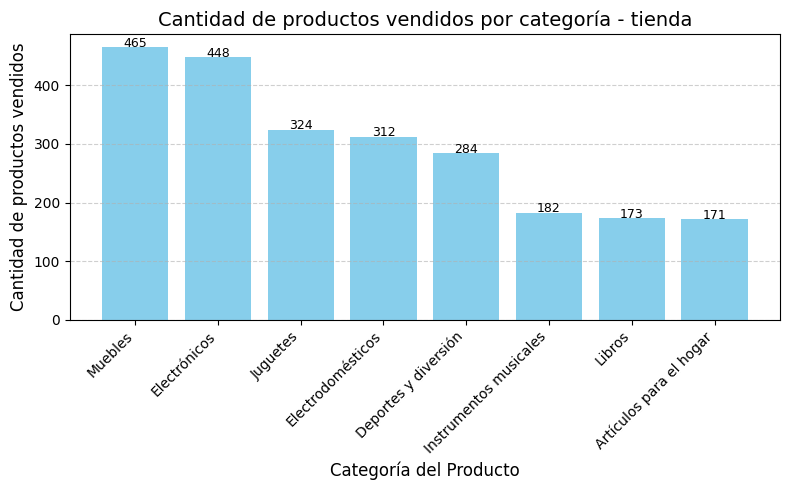

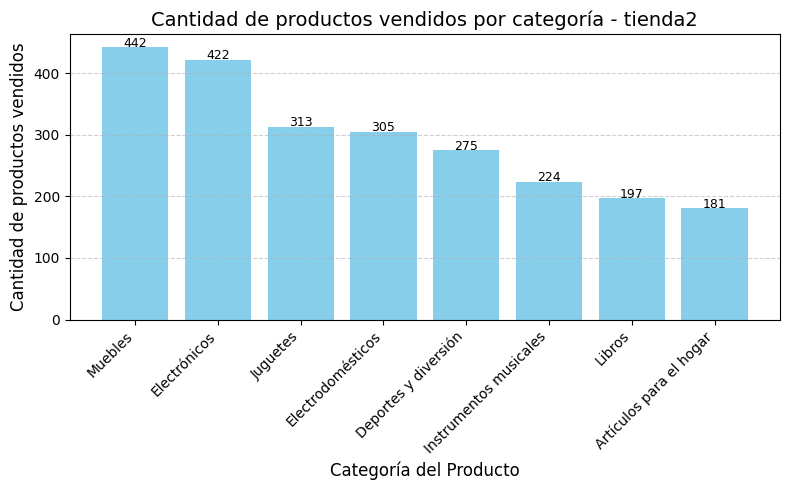

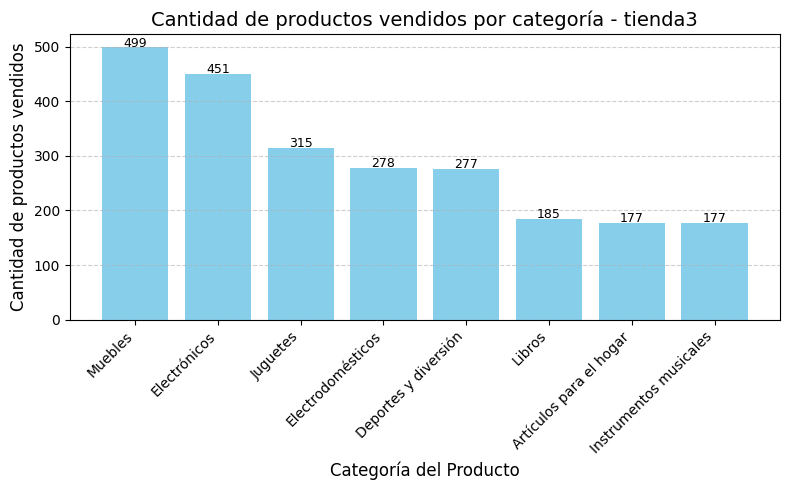

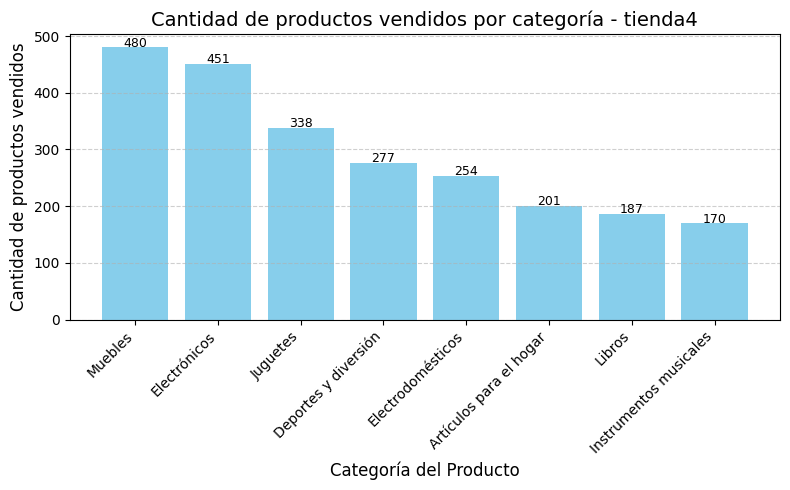

In [6]:
# Recorremos cada tienda
for nombre in nombres:
    df = ventas_por_categoria[nombre]

    plt.figure(figsize=(8, 5))
    plt.bar(df['Categor√≠a del Producto'], df['Cantidad de productos vendidos'], color='skyblue')

    plt.title(f'Cantidad de productos vendidos por categor√≠a - {nombre}', fontsize=14)
    plt.xlabel('Categor√≠a del Producto', fontsize=12)
    plt.ylabel('Cantidad de productos vendidos', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Mostrar etiquetas con los valores encima de cada barra
    for i, valor in enumerate(df['Cantidad de productos vendidos']):
        plt.text(i, valor + 1, str(valor), ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()

# 3. Calificaci√≥n promedio de la tienda


    Tienda  Calificaci√≥n media
0   tienda            3.976685
1  tienda2            4.037304
2  tienda3            4.048326
3  tienda4            3.995759




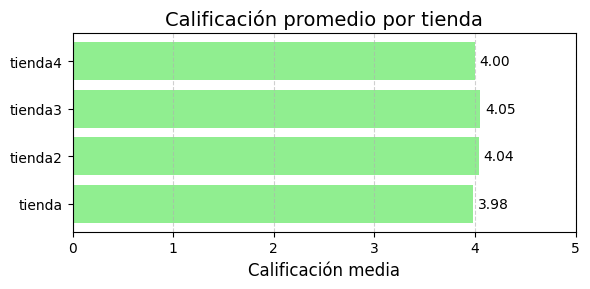

In [7]:
#calcular las calificaciones promedio de los clientes para cada tienda.
valoracion_media = pd.DataFrame({
    'Tienda': nombres,
    'Calificaci√≥n media': [df['Calificaci√≥n'].mean() for df in lista_tiendas]
})

print(valoracion_media)
print("\n")


plt.figure(figsize=(6, 3))
plt.barh(valoracion_media['Tienda'], valoracion_media['Calificaci√≥n media'], color='lightgreen')

plt.title('Calificaci√≥n promedio por tienda', fontsize=14)
plt.xlabel('Calificaci√≥n media', fontsize=12)
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Mostrar los valores al final de cada barra
for i, valor in enumerate(valoracion_media['Calificaci√≥n media']):
    plt.text(valor + 0.05, i, f'{valor:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()



# 4. Productos m√°s y menos vendidos

In [8]:
# calcular los productos mas vendidos pora cada tienda
mas_vendidos_por_tienda = pd.DataFrame({
    'Tienda': nombres,
    'Productos mas vendidos': [df['Producto'].value_counts().head(5).index.to_list() for df in lista_tiendas]
})

print(mas_vendidos_por_tienda)

    Tienda                             Productos mas vendidos
0   tienda  [Microondas, TV LED UHD 4K, Armario, Secadora ...
1  tienda2  [Iniciando en programaci√≥n, Microondas, Bater√≠...
2  tienda3  [Kit de bancas, Mesa de comedor, Cama king, Se...
3  tienda4  [Cama box, Cuberter√≠a, Dashboards con Power BI...


In [9]:
# calcular los productos menos vendidos pora cada tienda
menos_vendidos_por_tienda = pd.DataFrame({
    'Tienda': nombres,
    'Productos menos vendidos': [df['Producto'].value_counts().tail(5).index.to_list() for df in lista_tiendas]
})

print(menos_vendidos_por_tienda)

    Tienda                           Productos menos vendidos
0   tienda  [Ciencia de datos con Python, Pandereta, Olla ...
1  tienda2  [Auriculares, Sill√≥n, Mesa de comedor, Impreso...
2  tienda3  [Guitarra el√©ctrica, Set de vasos, Mochila, Mi...
3  tienda4  [Refrigerador, Ciencia de datos con Python, Gu...


# 5. Env√≠o promedio por tienda

In [10]:
#calcular el costo de env√≠o promedio para cada tienda
costo_envio_promedio = pd.DataFrame({
    'Tienda': nombres,
    'Costo de env√≠o promedio': [df['Costo de env√≠o'].mean() for df in lista_tiendas]
})

print(costo_envio_promedio)

    Tienda  Costo de env√≠o promedio
0   tienda             26018.609580
1  tienda2             25216.235693
2  tienda3             24805.680373
3  tienda4             23459.457167


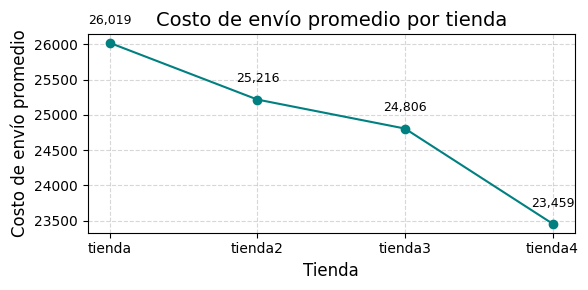

In [11]:
# --- Crear gr√°fico de l√≠neas ---
plt.figure(figsize=(6, 3))

plt.plot(
    costo_envio_promedio['Tienda'],
    costo_envio_promedio['Costo de env√≠o promedio'],
    marker='o',        # puntos en cada tienda
    linestyle='-',      # l√≠nea continua
    color='teal'        # color de la l√≠nea
)

# --- Personalizaci√≥n ---
plt.title('Costo de env√≠o promedio por tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo de env√≠o promedio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar los valores en cada punto
for i, valor in enumerate(costo_envio_promedio['Costo de env√≠o promedio']):
    plt.text(i, valor + (valor * 0.01), f'{valor:,.0f}', ha='center', fontsize=9)

# Mostrar gr√°fico
plt.show()

#Informe final

##introduccion

El presente an√°lisis compara el desempe√±o de cuatro tiendas considerando tres indicadores clave: ingreso total, calificaci√≥n promedio y costo de env√≠o. A partir de estos datos, se busca identificar cu√°l tienda presenta el mejor equilibrio entre rentabilidad, satisfacci√≥n del cliente y eficiencia log√≠stica. Este estudio permite determinar fortalezas y debilidades de cada tienda para orientar decisiones estrat√©gicas de venta.

## Analisis

* La tienda 4 presenta el desempe√±o m√°s bajo entre todas las evaluadas. Su ingreso total (1.038 √ó 10‚Åπ) es el menor, lo que refleja un volumen de ventas significativamente inferior en comparaci√≥n con las dem√°s tiendas.

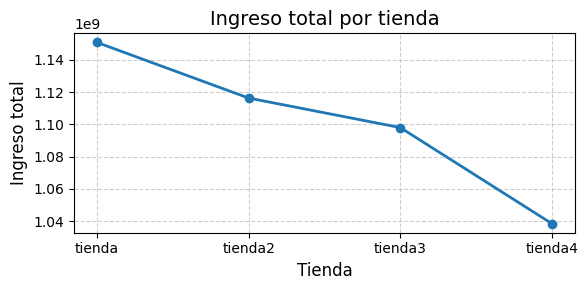

In [17]:
# Crear el gr√°fico de l√≠neas
plt.figure(figsize=(6, 3))
plt.plot(ingreso_total['Tienda'], ingreso_total['Precio'], marker='o', linestyle='-', linewidth=2)

# Personalizar el gr√°fico
plt.title('Ingreso total por tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingreso total', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar el gr√°fico
plt.show()

*  Aunque la calificaci√≥n promedio de la tienda 4 (3.99) no es mala, est√° por debajo de tiendas con mejor reputaci√≥n, como la tienda 3 (4.05)

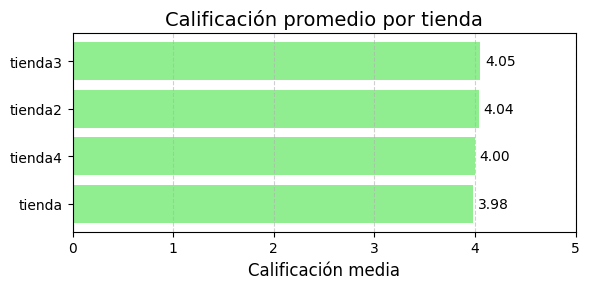

In [16]:
# Ordenar de forma descendente
valoracion_media = valoracion_media.sort_values(by='Calificaci√≥n media', ascending=True).reset_index(drop=True)

plt.figure(figsize=(6, 3))
plt.barh(valoracion_media['Tienda'], valoracion_media['Calificaci√≥n media'], color='lightgreen')

plt.title('Calificaci√≥n promedio por tienda', fontsize=14)
plt.xlabel('Calificaci√≥n media', fontsize=12)
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Mostrar los valores al final de cada barra
for i, valor in enumerate(valoracion_media['Calificaci√≥n media']):
    plt.text(valor + 0.05, i, f'{valor:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

*  la tienda 4 presenta el costo de env√≠o m√°s bajo, este ahorro no compensa la baja rentabilidad ni mejora significativamente la percepci√≥n del cliente

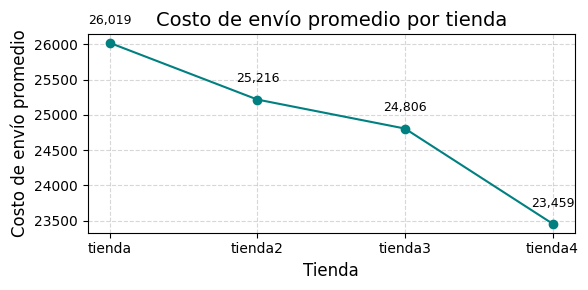

In [18]:
# --- Crear gr√°fico de l√≠neas ---
plt.figure(figsize=(6, 3))

plt.plot(
    costo_envio_promedio['Tienda'],
    costo_envio_promedio['Costo de env√≠o promedio'],
    marker='o',        # puntos en cada tienda
    linestyle='-',      # l√≠nea continua
    color='teal'        # color de la l√≠nea
)

# --- Personalizaci√≥n ---
plt.title('Costo de env√≠o promedio por tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo de env√≠o promedio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar los valores en cada punto
for i, valor in enumerate(costo_envio_promedio['Costo de env√≠o promedio']):
    plt.text(i, valor + (valor * 0.01), f'{valor:,.0f}', ha='center', fontsize=9)

# Mostrar gr√°fico
plt.show()

## Conlusion
La tienda con peor desempe√±o en general es **tienda4**.

Razones:

*  Presenta el menor ingreso total, lo que refleja un bajo nivel de ventas.

*  Su calificaci√≥n promedio es aceptable, pero no sobresaliente frente a las dem√°s.

*  Aunque tiene el costo de env√≠o m√°s bajo, este factor no compensa su baja rentabilidad ni mejora su posici√≥n competitiva.

**tienda4** presenta el rendimiento m√°s bajo en todos los indicadores analizados, lo que la convierte en la candidata ideal para ser seleccionada para la venta.

#README

In [19]:
%%writefile README.md
# üõçÔ∏è An√°lisis de Desempe√±o de Tiendas con Python y Pandas

Este proyecto realiza un an√°lisis comparativo del rendimiento de cuatro tiendas utilizando **Python**, **pandas** y **matplotlib**.
El objetivo es identificar la tienda con mejor desempe√±o general considerando m√©tricas de **ingresos totales**, **Ventas por categor√≠a**, **Productos m√°s y menos vendidos**,
**calificaci√≥n promedio** y **costo de env√≠o promedio**.

---

## üìä Objetivos del an√°lisis
- Calcular el **ingreso total** de cada tienda.
- Determinar la **cantidad de productos vendidos** por categor√≠a.
- Identificar los **productos m√°s y menos vendidos** por tienda.
- Obtener la **calificaci√≥n promedio** por tienda.
- Determinar el **costo de env√≠o promedio**.
- Representar los resultados mediante **gr√°ficos de l√≠neas y barras**.
- Identificar la tienda con **peor desempe√±o global** para considerar su venta.

---

## üßÆ Herramientas utilizadas
- **Python 3**
- **pandas** para el procesamiento y an√°lisis de datos.
- **matplotlib** para la visualizaci√≥n de resultados.
- **Google Colab** como entorno de desarrollo.

---

## üìà Resultados destacados
- **Tienda 4** presenta el menor ingreso total, una calificaci√≥n promedio solo aceptable y aunque tiene el costo de env√≠o m√°s bajo, no compensa su bajo rendimiento.
  Por ello, se considera **la candidata m√°s adecuada para vender**.

---

## üöÄ C√≥mo ejecutar el an√°lisis
1. Clona el repositorio:
   ```bash
   git clone https://github.com/Alvaro217-h/challege1_alura.git


Writing README.md
